In [1]:
from geographical_spatial_strength_extensions import *
from example_spatial_networks import *
import matplotlib

In [2]:
font = {'size' : 35,
       'family': 'serif',
       'sans-serif': ['Helvetica']}
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)
marker_cycle = ['o', 's', '*', '+', 'd', '<', 'p']

---

# Examples of each of the network types

C:\Users\Andy\Desktop\Work\github\networks\fitness\publish_code\geographical_spatial_strength_extensions.py:122: RuntimeWarning: divide by zero encountered in reciprocal
  distances = np.where(distances > 1, distances ** beta, 1)


Average Spatial Strength: 0.8254636830003822


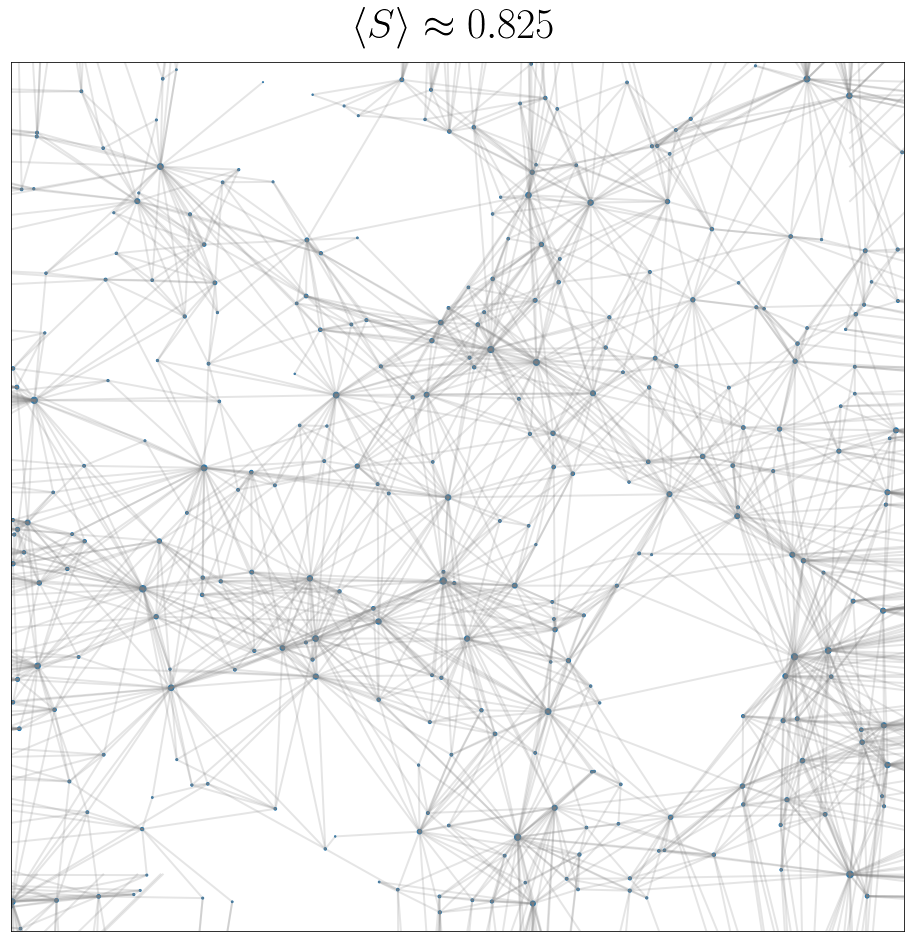

In [5]:
'''
Generate and plot a GF network
'''
print('Generating GF network')
g = gf_graph_model(n=300, beta=1)
graph_spatial_network_plot(g, ss_title=True)

C:\Users\Andy\Desktop\Work\github\networks\fitness\publish_code\geographical_spatial_strength_extensions.py:222: RuntimeWarning: divide by zero encountered in power
  distances_beta = distances ** beta


Average Spatial Strength: 1.0338034382047658


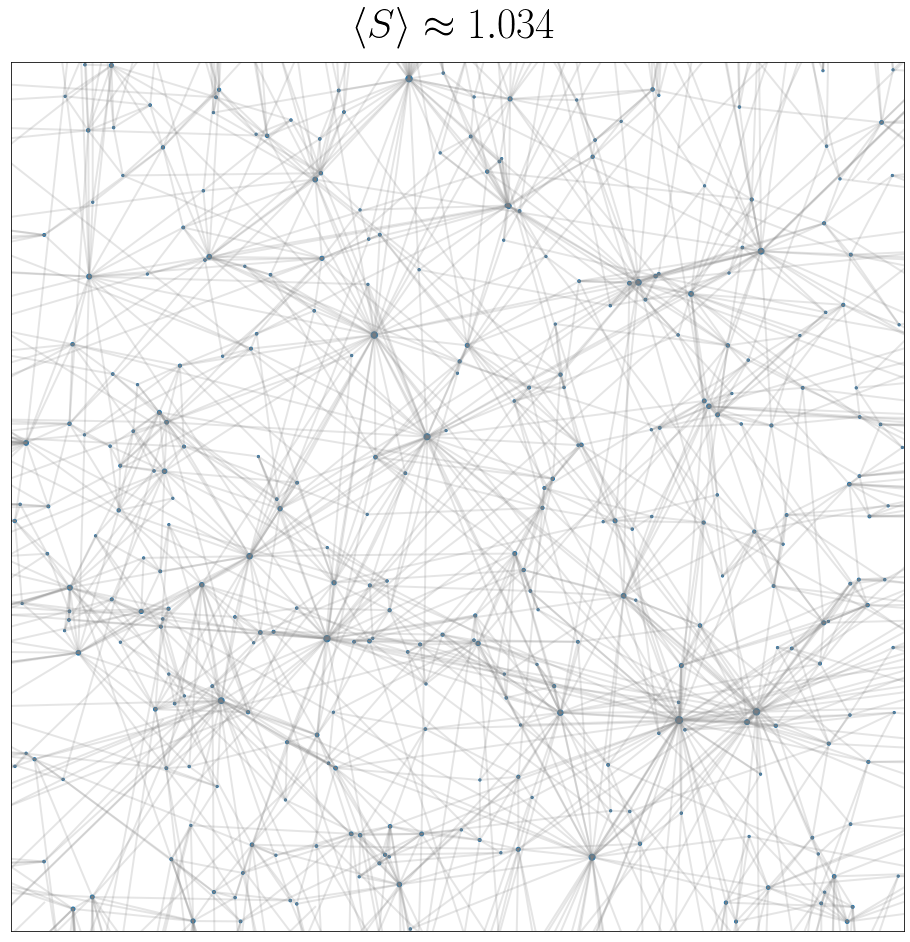

In [7]:
'''
Generate and plot a SPA network
'''
print('Generating plot of SPA network')
g = spa_graph_model(beta=3, n=300)
graph_spatial_network_plot(g, ss_title=True)

Generating plot of spatial configuration model based on BA graph


C:\Users\Andy\Desktop\Work\github\networks\fitness\publish_code\geographical_spatial_strength_extensions.py:315: RuntimeWarning: divide by zero encountered in power
  weighted_distances = d3 ** beta


Average Spatial Strength: 2.641342110894924


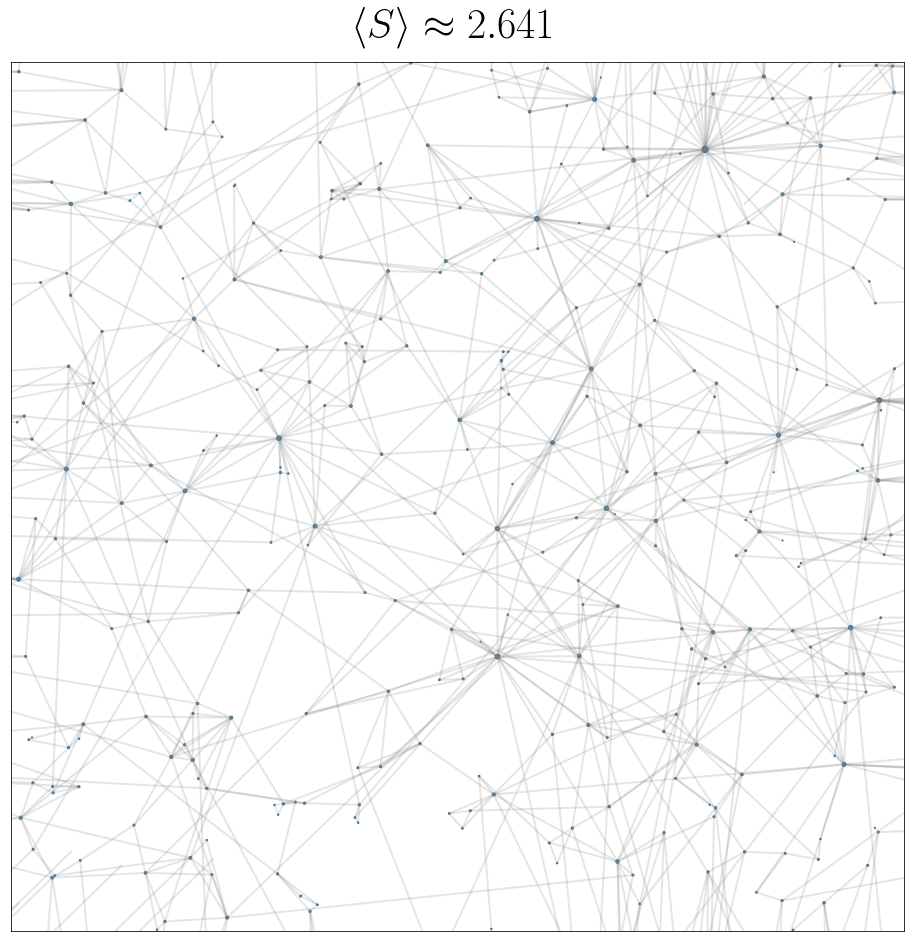

In [14]:
'''
Generate and plot a spatial configuration network based on a BA graph
'''
print('Generating plot of spatial configuration model based on BA graph')
g = sc_graph_model(beta=3, n=300)
graph_spatial_network_plot(g, ss_title=True)

---

# Computing Centralities

Here is an example of the code used to generate the mean centralities for GF networks

Generating GF networks for centrality analysis.
Computing clustering for GF networks.
Computing geodesic for GF networks.
Exception raised, graph likely not connected.                         Trial 3, beta = 0.000000
Exception raised, graph likely not connected.                         Trial 8, beta = 0.000000
Computing average_edge_length for GF networks.
Computing degree_assortativity for GF networks.


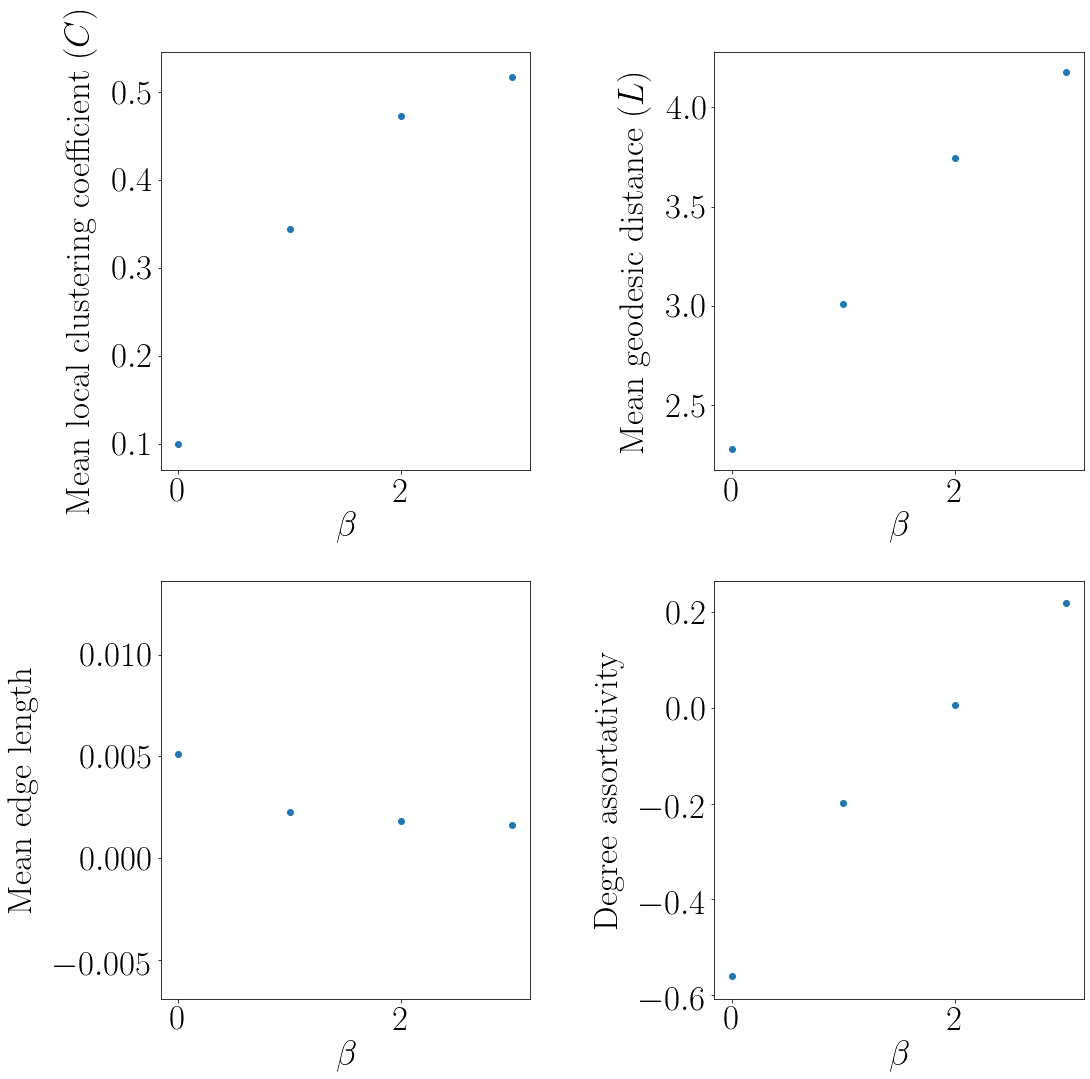

In [23]:
#Here we are doing a simplified version with n=300, 10 graphs averaged per data point
#This could be adjusted to use different values of beta, or changing the gf_graph_model()
#function can let us compute centralities for the different kinds of networks
print('Generating GF networks for centrality analysis from Section I C.')

graphs = {}
betas = [0, 1, 2, 3]
num_graphs = 10

for beta in betas:
    gs = []
    for i in range(num_graphs):
        g = gf_graph_model(n=300, beta=beta)
        gs.append(g)
    
    graphs[beta] = gs


plot_types = ['clustering', 'geodesic', 'average_edge_length', 'degree_assortativity']

fig, axs = plt.subplots(2, 2, figsize=(16, 16))
for i, analysis_type in enumerate(plot_types):
    print('Computing ' + analysis_type + ' for GF networks.')
    subplot = [2, 2, i+1]
    ix = math.floor(i / 2)
    iy = i % 2
    ax = axs[ix, iy]
    analyze_graphs_with_function(analysis_type, verbose=-1, 
        betas=betas, subplot=ax, graphs=graphs, invert_betas=False)

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)

Generating examples of GF networks for closeness centrality
Top two are beta=0, bottom two are beta=0.5


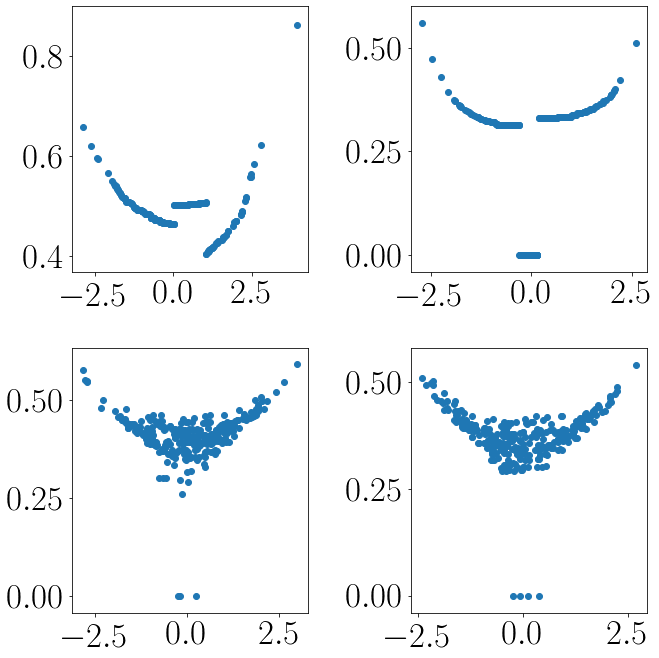

In [13]:
print('Generating examples of GF networks for closeness centrality')
print('Top two are beta=0, bottom two are beta=0.5')

graphs = []
closenesses = []

plot_fitnesses = []
plot_closenesses = []
betas = [0, 0.5]

for beta in betas:
    for i in range(2):
        g = gf_graph_model(n=300, beta=beta)
        closeness = nx.closeness_centrality(g)
        closenesses.append(closeness)    
        graphs.append(g)
    
for i in range(4):
    g = graphs[i]
    closeness = closenesses[i]

    x = []
    y = []

    for node in closeness:
        x.append(g.nodes[node]['fitness'])
        y.append(closeness[node])

    plot_fitnesses.append(x)
    plot_closenesses.append(y)
        
plt.figure(figsize=(10,10))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.scatter(plot_fitnesses[i], plot_closenesses[i])

plt.tight_layout()

---

# Drawing Example Networks

Here we draw the example networks used in Section V C and V D

Average Spatial Strength: 0.9987428571428641
Average Spatial Strength: 0.6866941162368572
Average Spatial Strength: 0.30035033816756274
Average Spatial Strength: 8.008333333333333


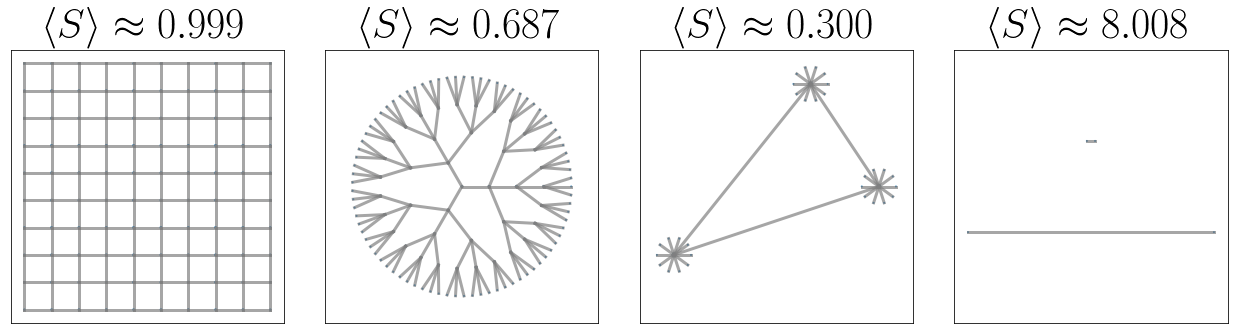

In [29]:
print('Generating example networks from Section V C')

web = generate_web()
lattice = generate_lattice(rows=10, columns=10)
hub = generate_hub(spoke_length=0.5)
breaking = generate_breaking_example()



plt.figure(figsize=(18, 5.5))



graph_spatial_network_plot(lattice, False, True, pbc=False, subplot=(1, 4, 1), ss_title=True, alpha=0.7, linewidth=3)
graph_spatial_network_plot(web, False, True, pbc=False, subplot=(1, 4, 2), ss_title=True, alpha=0.7, linewidth=3)
graph_spatial_network_plot(hub, False, True, pbc=False, subplot=(1, 4, 3), ss_title=True, alpha=0.7, linewidth=3)
graph_spatial_network_plot(breaking, False, True, pbc=False, subplot=(1, 4, 4), ss_title=True, alpha=0.7, linewidth=3)

plt.tight_layout()


Average Spatial Strength: 2.3389700387501176
Average Spatial Strength: 2.2792258835485026
Average Spatial Strength: 1.0132794216085712


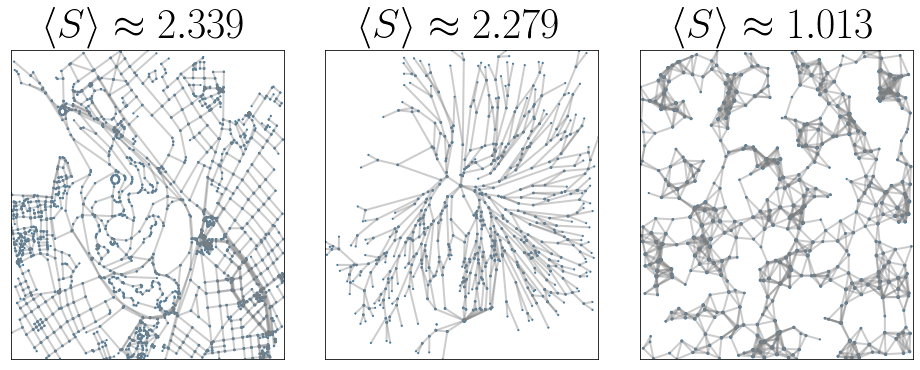

In [7]:
print('Generating networks from data and RGG network from Section V D')

fungal_name = 'Pv_M_I+4R_U_N_21d_4.mat'
continent = 'Africa'
city = 'Tunis'

city_network = load_city_network(continent, city)
fungal_network = load_fungal_network(fungal_name)
rgg = generate_rgg(n=500, r=0.07)

plt.figure(figsize=(18, 6))

graph_spatial_network_plot(city_network, False, True, pbc=False, subplot=(1, 4, 1), ss_title=True, alpha=0.4)
graph_spatial_network_plot(fungal_network, False, True, pbc=False, subplot=(1, 4, 2), ss_title=True, alpha=0.4)
graph_spatial_network_plot(rgg, False, True, pbc=False, subplot=(1, 4, 3), ss_title=True, alpha=0.4)

plt.tight_layout()
